In [2]:
using TVC

In [3]:
# veh = RocketParameters(MomentArm = t -> [0; 0; -0.4]); # The parameters of the rocket
# atmos = Atmosphere(g = h -> [0; 0; -9.80655]);
veh = RocketParameters()
atmos = Atmosphere()
traj = RocketTrajectoryParameters();

mdl = RocketProblem(veh, atmos, traj)

RocketProblem
  veh: RocketParameters{Float64, LinearAlgebra.Diagonal{Float64, Vector{Float64}}}
  atmos: Atmosphere
  traj: RocketTrajectoryParameters{Float64}


In [4]:
sol = solveProblem(mdl);

k  | status   | vd    | vs    | vbc   | J         | ΔJ %      | Δx    | Δu    | Δp    | δ     | dyn | ηx    | ηu    | ηp   
---+----------+-------+-------+-------+-----------+-----------+-------+-------+-------+-------+-----+-------+-------+------
1  | ALMOST_O | 1e-01 | 0e+00 | 6e-09 | 9.26e+00  |           | 8e-02 | 4e-01 | 2e-01 | 2e-01 | T   | 0.10  | 0.40  | 0.16 


2  | ALMOST_O | 5e-04 | 0e+00 | 8e-09 | 3.58e-01  | 96.13     | 1e-02 | 3e-01 | 3e-02 | 4e-02 | T   | 0.08  | 0.28  | 0.03 


3  | ALMOST_O | 3e-04 | 0e+00 | 1e-08 | 2.82e-01  | 21.43     | 9e-03 | 3e-01 | 7e-04 | 1e-02 | T   | 0.05  | 0.28  | 0.00 


4  | ALMOST_O | 8e-06 | 0e+00 | 3e-08 | 2.79e-01  | 0.86      | 2e-03 | 2e-01 | 4e-05 | 2e-03 | T   | 0.03  | 0.19  | 0.00 


5  | ALMOST_O | 5e-06 | 0e+00 | 2e-08 | 2.79e-01  | -0.02     | 1e-03 | 2e-01 | 3e-05 | 1e-03 | T   | 0.08  | 0.21  | 0.00 


Coast time (s): 1.324640472775682
Impact Velocity Magnitude (m/s): 0.5284777713449714
True Impact Velocity Magnitude (m/s): 0.5275954252802549


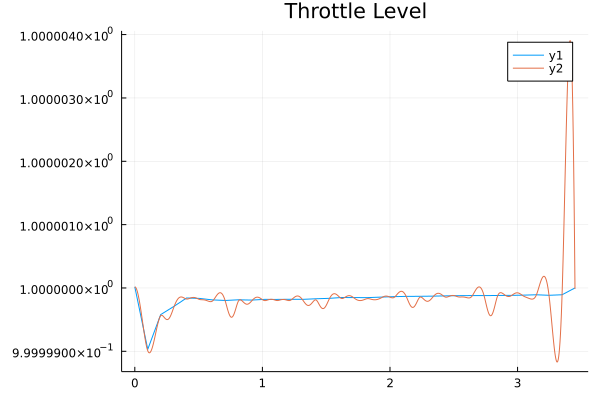

In [5]:
printSolution(sol)
plotThrottle(sol)

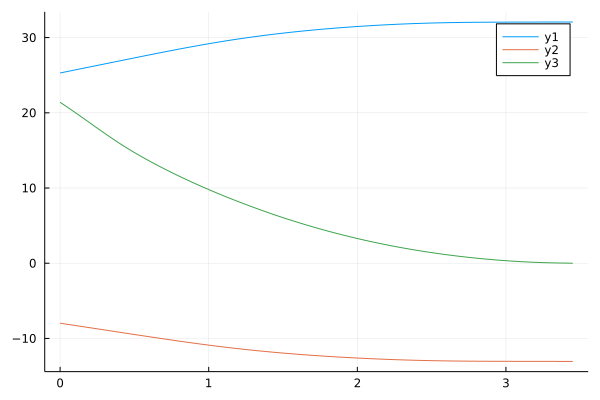

In [6]:
using LinearAlgebra, SCPToolbox, Plots

t = LinRange(0, 1, 1000)
r = mapreduce(k -> sample(sol.xc, k)[veh.id_r], hcat, t)
Plots.plot(motorTime.(t, Ref(mdl)), r')

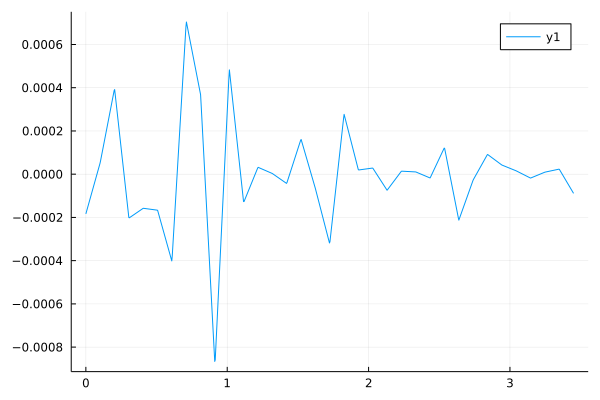

In [7]:
r = mapreduce(k -> sample(sol.uc, k)[veh.id_roll], hcat, t)
Plots.plot(motorTime.(t, Ref(mdl)), r')

In [8]:
sol.xd

19×35 Matrix{Float64}:
  25.2986        25.7044        26.1104       …   32.0702        32.0748
  -7.97392       -8.27833       -8.58279         -13.0542       -13.0576
  21.3964        20.036         18.6241            0.0322668     -1.98485e-8
   4.0            4.00009        4.00131           0.0435224      0.0455783
  -3.0           -3.00006       -3.00098          -0.0326139     -0.0341545
 -12.9902       -13.742        -13.9987       …   -0.361928      -0.524406
   1.0            0.999999       0.999999          0.999999       1.0
  -4.49624e-10   -3.40713e-6    -0.000108684      -0.00011566     7.32165e-10
  -3.11494e-10   -4.59069e-6    -0.000145884      -0.000154588    9.49843e-10
   2.81997e-14   -0.00108629    -0.000695776      -0.000552487   -1.9661e-5
  -1.17629e-9    -0.000335338   -0.00534452   …    0.0081989     -1.87185e-9
  -1.79812e-9    -0.000452648   -0.00717615        0.0109666     -2.40972e-9
   3.55271e-15   -0.0266452      0.0654393         0.0133468     -7.105